In [1]:
import pandas as pd

In [3]:
mpg = pd.read_csv('mpg.csv')

In [5]:
#x축은 displ(배기량), y축은 hwy(고속도로연비)를 나타낸 산점도 만들기

In [7]:
import seaborn as sns

<Axes: xlabel='displ', ylabel='hwy'>

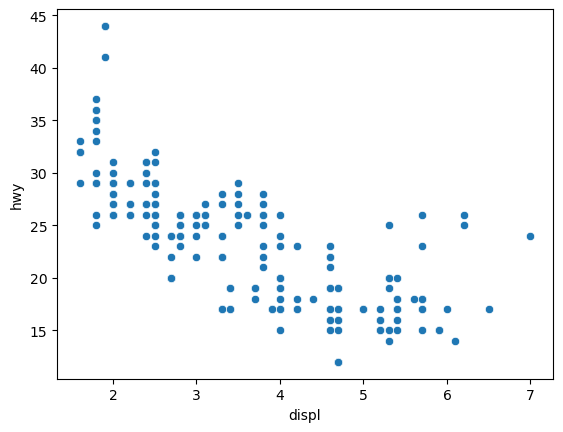

In [8]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy')

[(3.0, 6.0)]

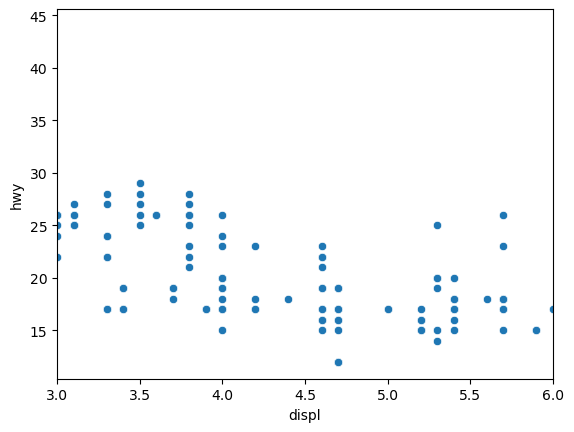

In [9]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy') \
    .set(xlim = [3,6])
# x축에 나타낼 범위 정하기
# x축은 3~6까지만 나타낸다는 의미

[(3.0, 6.0), (10.0, 30.0)]

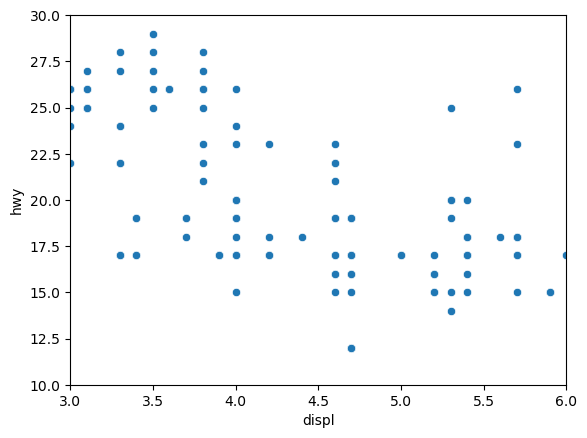

In [10]:
sns.scatterplot(data=mpg, x='displ', y='hwy')\
    .set(xlim=[3,6], ylim = [10,30])
#y축에 나타낼 범위 정하기
#y축은 10~30까지만 나타낸다는 의미

<Axes: xlabel='displ', ylabel='hwy'>

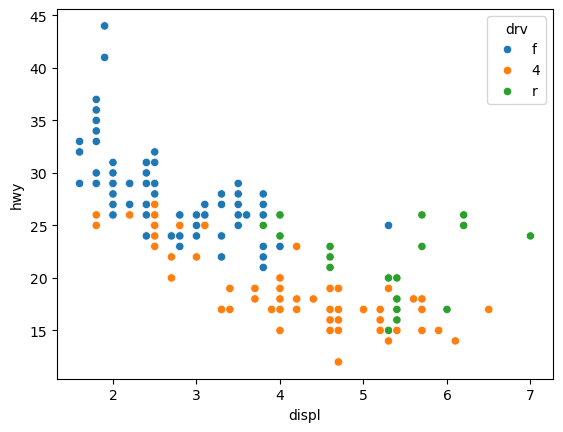

In [11]:
sns.scatterplot(data=mpg, x = 'displ', y = 'hwy', hue = 'drv')
#hue는 표식의 색을 종류별로 다르게 표현
# 위의 코드는 drv 별로 다르게 표현

In [12]:
import matplotlib.pyplot as plt #그래프 설정 바꾸는 패키지

In [13]:
#해상도 // 기본값은 72
plt.rcParams.update({'figure.dpi' : '150'}) 

In [14]:
#가로, 세로 크기 // 기본값은 [6,4]
plt.rcParams.update({'figure.figsize' : [8,6]})

In [15]:
# 글자크기 // 기본값은 10
plt.rcParams.update({'font.size' : 15})

In [16]:
#폰트 // 기본값은 sans-serif
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [18]:
#위의 그래프 설정 바꾸는 4줄을 한번에 작성하는 방법
plt.rcParams.update({
    'figure.dpi' : '150',
    'figure.figsize' : [8,6],
    'font.size' : '15',
    'font.family' : 'Malgun Gothic'
})

In [19]:
#설정한 내용 원래대로 되돌리기
plt.rcdefaults()

In [20]:
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy','mean'))
#drv별로 그룹핑한 후,
#hwy별 평균을 낸 값들을 mean_hwy라는 파생변수를 df_mpg로 만듦

In [21]:
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [23]:
df_mpg = mpg.groupby('drv',as_index = False) \
            .agg(mean_hwy = ('hwy','mean'))
#as_index = False 코드를 넣어서 drv별로 그룹핑된게 인덱스 값이 아니라 
#하나의 변수로 나타날 수 있도록 함

In [24]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

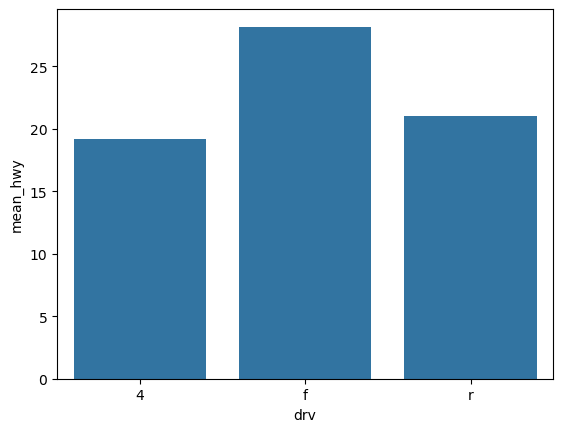

In [26]:
sns.barplot(data=df_mpg, x = 'drv', y = 'mean_hwy')
#평균 막대 그래프 만들기

In [27]:
#데이터프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
# .sort_values()함수 이용해서 데이터프레임을 내림차순으로 정렬

<Axes: xlabel='drv', ylabel='mean_hwy'>

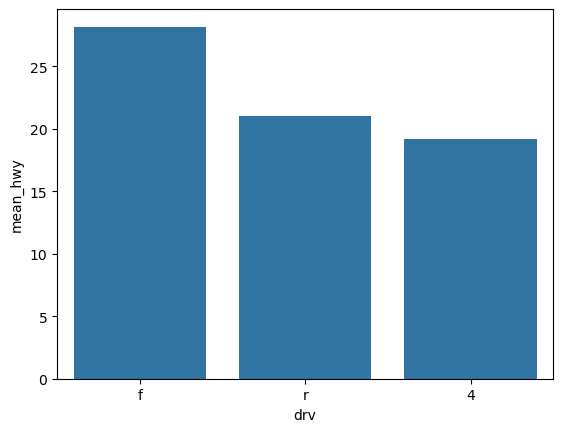

In [29]:
#막대 그래프 만들기
sns.barplot(data=df_mpg, x = 'drv', y = 'mean_hwy')
#바로 위의 코드에서 df_mpg를 애초에 각 변수별로 존재하는 개수에 따라 내림차순 정렬 해놓았으므로 
# 막대그래프가 내림차순 정렬되어 나타나짐

In [30]:
#집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(n=('drv','count'))
#cf) as_index=False는 groupby로 묶은 변수명을 인덱스로 자동 지정되는 설정을 막아줌

In [31]:
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

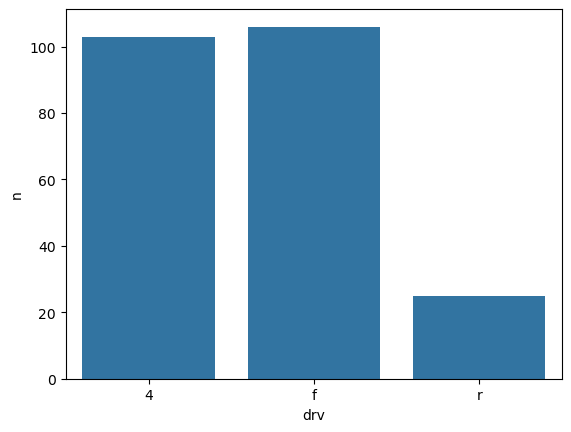

In [38]:
#막대 그래프 만들기
sns.barplot(data=df_mpg, x = 'drv', y='n')

<Axes: xlabel='drv', ylabel='count'>

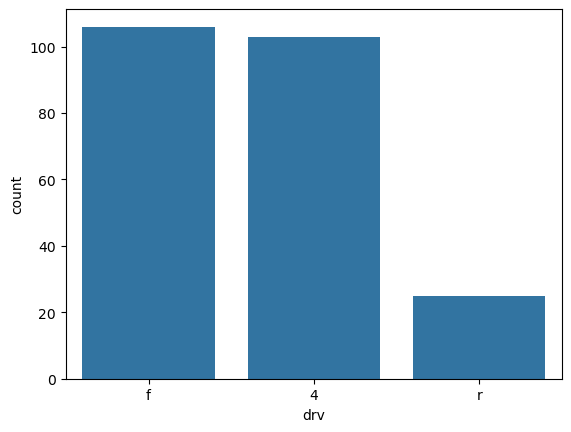

In [43]:
#countplot() 이용해서 바로 빈도 막대그래프 만들기
sns.countplot(data=mpg, x = 'drv')
#barplot()이용해서 빈도 막대그래프 만들려면, df.groupby()와 df.agg()를 이용하여
#집단별 빈도표를 우선적으로 만든 후에, barplot()이용해서 빈도막대그래프 만들어야함. 

In [46]:
mpg['drv'].unique()  #mpg의 drv의 순서를 알 수 잇음

array(['f', '4', 'r'], dtype=object)

In [47]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

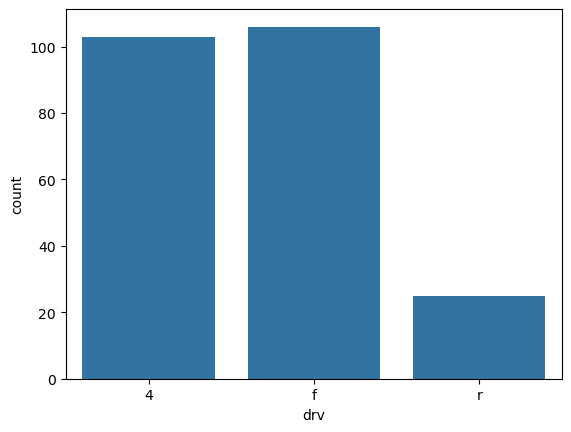

In [50]:
#mpg의 빈도막대그래프를 4,f,r순서로 막대 정렬하기
sns.countplot(data=mpg, x = 'drv', order = ['4','f','r'])

In [51]:
#drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

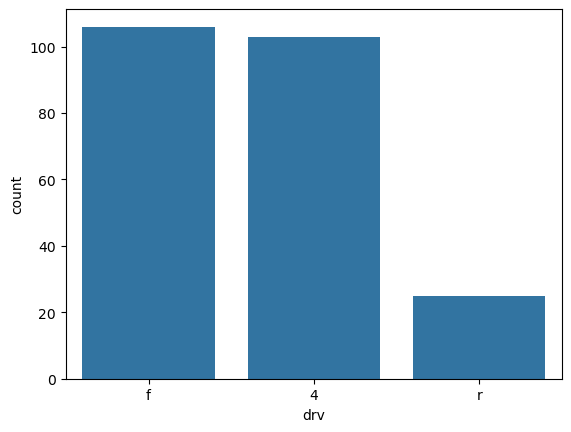

In [55]:
#drv의 빈도가 높은 순으로 막대 정렬
sns.countplot(data=mpg, x = 'drv', 
              order = mpg['drv'].value_counts().index)

In [67]:
#economics 데이터 불러오기
economics = pd.read_csv('economics.csv')

In [69]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

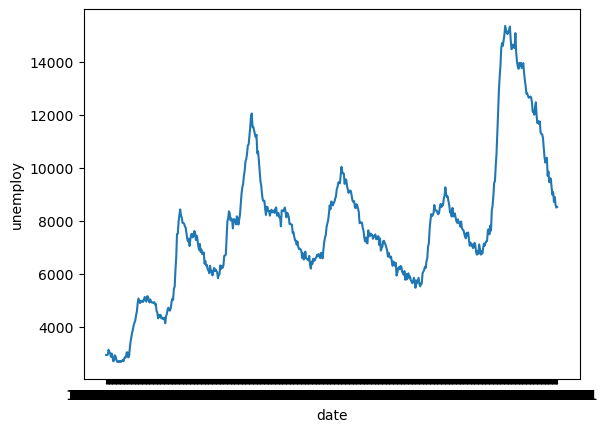

In [71]:
sns.lineplot(data=economics, x = 'date', y='unemploy')
# x축은 시간, y축은 실업자 수
# sns.lineplot()은 선그래프를 만들어주는 함수
# 지금은 x축인 date가 문자(object)타입으로 되어 있음

In [73]:
#x축을 날짜 시간 타입 변수로 만들기
economics['date2'] = pd.to_datetime(economics['date'])

In [75]:
#변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [77]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [81]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [83]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [85]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [87]:
#연도 변수 만들기(추가하기)
economics['year'] = economics['date2'].dt.year

In [91]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

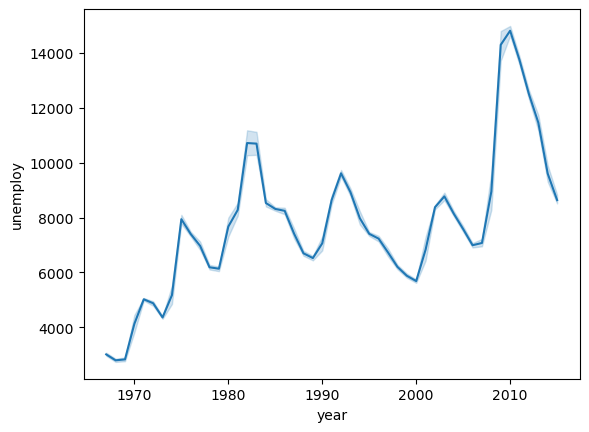

In [93]:
#x축에 연도 표시하기
sns.lineplot(data=economics, x = 'year', y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

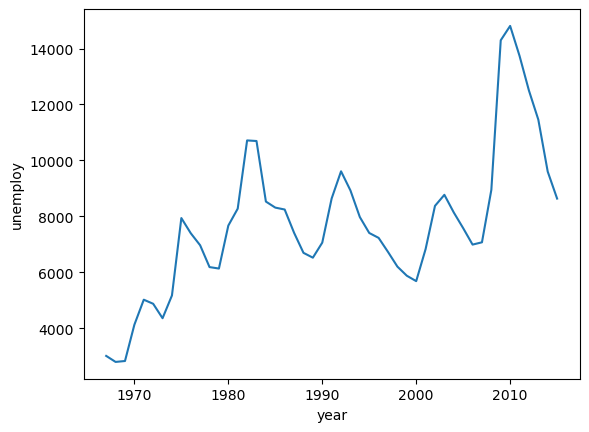

In [95]:
#신뢰구간 제거
#위의 선 그래프에서 선의 위아래에 표시된 면적이 신뢰구간
sns.lineplot(data=economics, x = 'year', y='unemploy', errorbar = None)

<Axes: xlabel='drv', ylabel='hwy'>

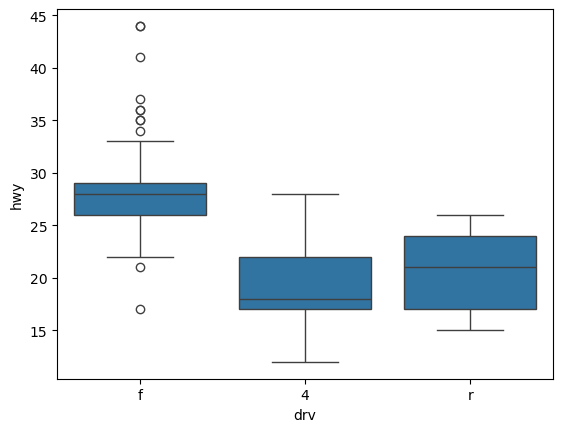

In [99]:
sns.boxplot(data=mpg, x = 'drv', y='hwy')